## Q1: K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)

In [44]:
import numpy as np
import pandas as pd
import missingno as msn
import seaborn as sns

from sklearn.model_selection import KFold

In [45]:
df = pd.read_csv('USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


<AxesSubplot:>

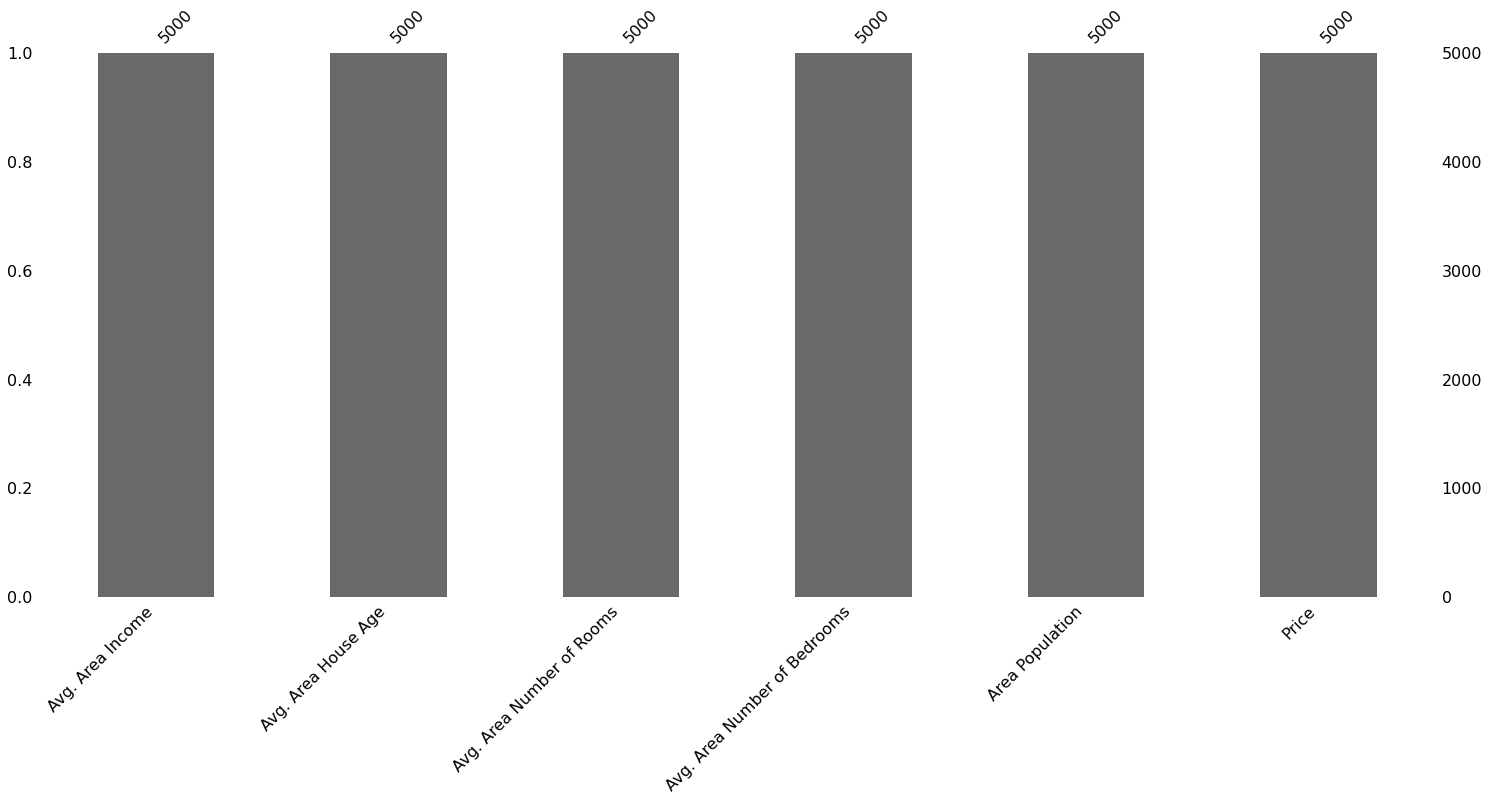

In [46]:
# check for missing values
msn.bar(df)

<AxesSubplot:>

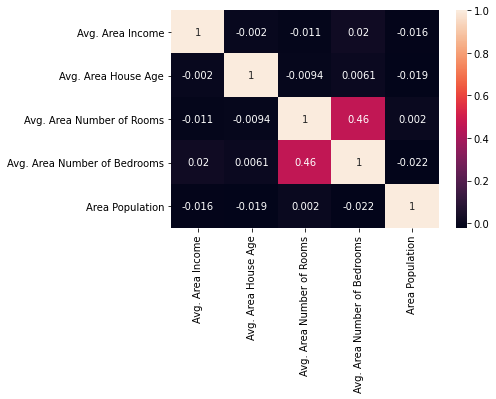

In [47]:
# check for relation between features
sns.heatmap(df.iloc[:,:5].corr(),annot=True)

In [48]:
# Standardize the data
X = df.iloc[:,:5]
y = df.iloc[:,5]

u = np.mean(X)
std = np.std(X)
X_scaled = (X-u)/std
X_scaled = X_scaled.to_numpy()
print(X_scaled)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [49]:
# add column of 1's at 0th index
X_new=np.insert(X_scaled,0,1,axis=1)
print(X_new)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [ 1.         -0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [ 1.         -0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [ 1.         -0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [50]:
y = np.array(y)

In [51]:
# split the data in train and test
split = int(len(X_new)*0.70)

X_train = X_new[:split, :]
X_test = X_new[split:, :]
y_train = y[:split]
y_test = y[split:]

In [52]:
print(X_train, X_test, y_train, y_test)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [ 1.          1.51900644 -0.38168207 -0.78131606 -0.43867417  1.79215718]
 [ 1.         -0.60502575  1.34899475 -0.51593308 -1.39490331  0.14224368]
 [ 1.         -0.15482362 -1.23914534 -1.10167293 -1.53266514  0.57135744]] [[ 1.          0.40988855 -0.98993223 -1.13805992 -1.33817785 -1.12492995]
 [ 1.         -0.40282512  2.07744903 -1.29838425 -1.29765967 -0.27789909]
 [ 1.          2.10782492  0.40571791  1.81363115 -0.5116069   0.09301127]
 ...
 [ 1.         -0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [ 1.         -0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [ 1.         -0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]] [1059033.558  1505890.915  1058987.988  ... 1710570.17   1432012.871
  881443.9247] [ 67

In [53]:
print(X_train.shape)

(3500, 6)


In [54]:
# checking r2_score without cross-validation using sklearn linear model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
from sklearn import metrics
print(metrics.r2_score(y_test,y_predict))

0.9176499755975894


## linear regression theta values by least square error fit, predicted values, r2_scores

In [55]:
theta_list = []
predict_list = []

def calculate_theta(X_train, y_train):
    X_sq = X_train.T.dot(X_train)
    X_inv = np.linalg.inv(X_sq)
    theta = (X_inv.dot(X_train.T)).dot(y_train)
    theta_list.append(theta)
    return theta


def predict(X_test, theta):
    y_predict = X_test.dot(theta)
    predict_list.append(y_predict)
    return y_predict


def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100

## 5-fold cross validation applied

In [56]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
score_list = []
for train_index, test_index in cv.split(X_new):
    X_train, X_test, y_train, y_test = X_new[train_index], X_new[test_index], y[train_index], y[test_index]
    theta = calculate_theta(X_train, y_train)
    y_predict = predict(X_test, theta)
    score = r2_score(y_test, y_predict)
    score_list.append(score)
    print("Score is: ", score, "\n")
    

Score is:  91.79971706985147 

Score is:  91.45677884802818 

Score is:  91.16116385364478 

Score is:  91.93091764960816 

Score is:  92.43869413350316 



In [57]:
print(theta_list)
print(score_list)
print("Max r2_score: ", max(score_list))

[array([1232002.67482411,  230745.9407348 ,  163243.27314515,
        120309.77397759,    3011.45976111,  151552.63069359]), array([1232037.85755946,  229081.97914235,  165882.1605634 ,
        121536.57475055,    2092.4478622 ,  150874.99274586]), array([1231951.92563847,  230224.50511001,  162766.17455493,
        121022.77324577,    1247.16258975,  150234.77720419]), array([1232751.46486511,  229500.10043209,  165212.07110924,
        122839.9376815 ,    3063.71699324,  150917.88484984]), array([1.23161736e+06, 2.30225051e+05, 1.63956839e+05, 1.21115120e+05,
       7.83467170e+02, 1.50662447e+05])]
[91.79971706985147, 91.45677884802818, 91.16116385364478, 91.93091764960816, 92.43869413350316]
Max r2_score:  92.43869413350316


In [58]:
# idx of best r2_score and best theta matrix
best_score_idx = score_list.index(max(score_list)) 
print(best_score_idx)

best_theta = theta_list[best_score_idx]
print(best_theta)


4
[1.23161736e+06 2.30225051e+05 1.63956839e+05 1.21115120e+05
 7.83467170e+02 1.50662447e+05]


In [59]:
# Again divide data in 70-30 and apply regression with best parameters
split = int(len(X_new)*0.70)

new_X_train = X_new[:split, :]
new_X_test = X_new[split:, :]
new_y_train = y[:split]
new_y_test = y[split:]

In [60]:
new_y_predict = predict(new_X_test, best_theta)
score = r2_score(new_y_test, new_y_predict)
print(score)

91.77939588121502
